In [45]:
import pickle
import matplotlib.pyplot as plt

In [46]:
list_algSSBI = ['DFR', 'IC', 'GD']
list_auxOSNR = [value for value in range(24,42,2)]

In [47]:
list_auxOSNR_BR = [value for value in range(24,34,2)]
list_BER_BR = []

for OSNR in list_auxOSNR_BR:
    nameFile = f'.\\arquivosPickle\\addAwgn_DFR-GD-IC\\64QAM_L-160km_AWGN-[True-{OSNR}]_LOSPR-8dB_Receiver-[BR].pkl'
    with open(nameFile, 'rb') as arquivo:
            data = pickle.load(arquivo)
            list_BER_BR.append(data['BER'])

In [48]:
list_BER = [ [], [],[] ]

for idx_algSSBI, algSSBI in enumerate(list_algSSBI):
    for OSNR in list_auxOSNR:
        nameFile = f'.\\arquivosPickle\\addAwgn_DFR-GD-IC\\64QAM_L-160km_AWGN-[True-{OSNR}]_LOSPR-8dB_Receiver-[SER-{algSSBI}].pkl'
        with open(nameFile, 'rb') as arquivo:
                data = pickle.load(arquivo)
                list_BER[idx_algSSBI].append(data['BER'])

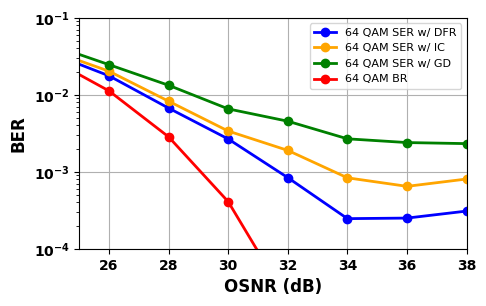

In [49]:
plt.figure(figsize=(5,3))
plt.semilogy(list_auxOSNR, list_BER[0], '-o', color='blue', linewidth=2.0, label= '64 QAM SER w/ DFR')
plt.semilogy(list_auxOSNR, list_BER[1], '-o', color='orange', linewidth=2.0, label= '64 QAM SER w/ IC')
plt.semilogy(list_auxOSNR, list_BER[2], '-o', color='green', linewidth=2.0, label= '64 QAM SER w/ GD')
plt.semilogy(list_auxOSNR_BR, list_BER_BR, '-o', color='red', linewidth=2.0, label= '64 QAM BR')
plt.ylabel('BER', fontsize=12.0, fontweight='bold')
plt.xlabel('OSNR (dB)', fontsize=12.0, fontweight='bold')
plt.legend(loc='upper right', fontsize=8.0)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlim(25,38)
plt.ylim(1e-4, 1e-1)
plt.grid()